In [1]:
from tensorflow.keras.callbacks import TensorBoard
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
import pandas as pd
from time import time
import numpy as np

In [2]:
data=pd.read_csv('12_features_data.csv')
labels=pd.read_csv('12_features_labels.csv')

In [3]:
del data['Unnamed: 0']
data.head()

,CC_area,CC_perimeter,CC_circularity,CC_length,W1,W2,W3,W4,W5,W6,W7,volume
0,674.75,216.77,0.180444,76.5,28.25,135.25,95.50,83.50,74.75,58.25,199.25,1654001.750
1,620.50,196.34,0.202275,73.0,11.50,124.75,112.50,85.25,60.75,51.75,174.00,1566818.750
2,617.00,203.15,0.187880,74.0,22.75,160.25,92.50,71.00,60.75,43.50,166.25,1603843.625
3,524.50,191.32,0.180072,67.5,18.25,79.25,95.25,65.00,53.75,52.00,161.00,1434097.750
4,655.25,206.12,0.193817,77.0,15.00,141.00,103.25,88.50,69.75,52.50,185.25,1520944.500


In [4]:
del labels['Unnamed: 0']
labels.head()

,label
0,1
1,1
2,1
3,1
4,1


In [5]:
X=np.array(data)
Y=np.array(labels)

In [6]:
print(X.shape,Y.shape)

(1100, 12) (1100, 1)


In [17]:
n_folds=10
i=0
scores={}
for j in range(1,51):
    scores_list=[]
    skf =StratifiedKFold(5)
    for i, (train,test) in enumerate(skf.split(X, Y)):
            #tensorboard=TensorBoard(log_dir='./logs/Exp1/fold_{}'.format(i))
            print("Running Fold", i+1, "/", n_folds)
            x_train=np.array([X[i] for i in train])
            y_train=np.array([Y[i] for i in train])
            x_test=np.array([X[i] for i in test])
            y_test=np.array([Y[i] for i in test])
            knn=KNeighborsClassifier(n_neighbors=j)
            knn.fit(x_train,y_train)
            y_pred=knn.predict(x_test)
            scores_list.append(metrics.accuracy_score(y_test,y_pred))
            print(scores_list)
    scores[j]=scores_list

Running Fold 1 / 10
[0.5067873303167421]
Running Fold 2 / 10
[0.5067873303167421, 0.4681818181818182]
Running Fold 3 / 10
[0.5067873303167421, 0.4681818181818182, 0.5227272727272727]
Running Fold 4 / 10
[0.5067873303167421, 0.4681818181818182, 0.5227272727272727, 0.4681818181818182]
Running Fold 5 / 10
[0.5067873303167421, 0.4681818181818182, 0.5227272727272727, 0.4681818181818182, 0.5114155251141552]
Running Fold 1 / 10
[0.5203619909502263]
Running Fold 2 / 10
[0.5203619909502263, 0.5363636363636364]
Running Fold 3 / 10
[0.5203619909502263, 0.5363636363636364, 0.4909090909090909]
Running Fold 4 / 10
[0.5203619909502263, 0.5363636363636364, 0.4909090909090909, 0.4772727272727273]
Running Fold 5 / 10
[0.5203619909502263, 0.5363636363636364, 0.4909090909090909, 0.4772727272727273, 0.4931506849315068]
Running Fold 1 / 10
[0.5429864253393665]
Running Fold 2 / 10
[0.5429864253393665, 0.5227272727272727]
Running Fold 3 / 10
[0.5429864253393665, 0.5227272727272727, 0.5136363636363637]
Running

/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

[0.497737556561086]
Running Fold 2 / 10
[0.497737556561086, 0.4954545454545455]
Running Fold 3 / 10
[0.497737556561086, 0.4954545454545455, 0.4772727272727273]
Running Fold 4 / 10
[0.497737556561086, 0.4954545454545455, 0.4772727272727273, 0.5227272727272727]
Running Fold 5 / 10
[0.497737556561086, 0.4954545454545455, 0.4772727272727273, 0.5227272727272727, 0.502283105022831]
Running Fold 1 / 10
[0.5429864253393665]
Running Fold 2 / 10
[0.5429864253393665, 0.5636363636363636]
Running Fold 3 / 10
[0.5429864253393665, 0.5636363636363636, 0.4954545454545455]
Running Fold 4 / 10
[0.5429864253393665, 0.5636363636363636, 0.4954545454545455, 0.4954545454545455]
Running Fold 5 / 10
[0.5429864253393665, 0.5636363636363636, 0.4954545454545455, 0.4954545454545455, 0.4840182648401826]
Running Fold 1 / 10
[0.49321266968325794]
Running Fold 2 / 10
[0.49321266968325794, 0.4954545454545455]
Running Fold 3 / 10
[0.49321266968325794, 0.4954545454545455, 0.5272727272727272]
Running Fold 4 / 10
[0.4932126

/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

[0.5203619909502263]
Running Fold 2 / 10
[0.5203619909502263, 0.5045454545454545]
Running Fold 3 / 10
[0.5203619909502263, 0.5045454545454545, 0.509090909090909]
Running Fold 4 / 10
[0.5203619909502263, 0.5045454545454545, 0.509090909090909, 0.4818181818181818]
Running Fold 5 / 10
[0.5203619909502263, 0.5045454545454545, 0.509090909090909, 0.4818181818181818, 0.5388127853881278]
Running Fold 1 / 10
[0.5520361990950227]
Running Fold 2 / 10
[0.5520361990950227, 0.5272727272727272]
Running Fold 3 / 10
[0.5520361990950227, 0.5272727272727272, 0.509090909090909]
Running Fold 4 / 10
[0.5520361990950227, 0.5272727272727272, 0.509090909090909, 0.5136363636363637]
Running Fold 5 / 10
[0.5520361990950227, 0.5272727272727272, 0.509090909090909, 0.5136363636363637, 0.5251141552511416]
Running Fold 1 / 10
[0.5339366515837104]
Running Fold 2 / 10
[0.5339366515837104, 0.5227272727272727]
Running Fold 3 / 10
[0.5339366515837104, 0.5227272727272727, 0.509090909090909]
Running Fold 4 / 10
[0.53393665158

/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

[0.5610859728506787, 0.509090909090909, 0.5227272727272727]
Running Fold 4 / 10
[0.5610859728506787, 0.509090909090909, 0.5227272727272727, 0.5181818181818182]
Running Fold 5 / 10
[0.5610859728506787, 0.509090909090909, 0.5227272727272727, 0.5181818181818182, 0.502283105022831]
Running Fold 1 / 10
[0.5610859728506787]
Running Fold 2 / 10
[0.5610859728506787, 0.4954545454545455]
Running Fold 3 / 10
[0.5610859728506787, 0.4954545454545455, 0.5454545454545454]
Running Fold 4 / 10
[0.5610859728506787, 0.4954545454545455, 0.5454545454545454, 0.4818181818181818]
Running Fold 5 / 10
[0.5610859728506787, 0.4954545454545455, 0.5454545454545454, 0.4818181818181818, 0.5159817351598174]
Running Fold 1 / 10
[0.5429864253393665]
Running Fold 2 / 10
[0.5429864253393665, 0.5]
Running Fold 3 / 10
[0.5429864253393665, 0.5, 0.509090909090909]
Running Fold 4 / 10
[0.5429864253393665, 0.5, 0.509090909090909, 0.5272727272727272]
Running Fold 5 / 10
[0.5429864253393665, 0.5, 0.509090909090909, 0.527272727272

/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

[0.5384615384615384, 0.5272727272727272, 0.5409090909090909, 0.4909090909090909, 0.4977168949771689]
Running Fold 1 / 10
[0.5339366515837104]
Running Fold 2 / 10
[0.5339366515837104, 0.509090909090909]
Running Fold 3 / 10
[0.5339366515837104, 0.509090909090909, 0.5363636363636364]
Running Fold 4 / 10
[0.5339366515837104, 0.509090909090909, 0.5363636363636364, 0.4772727272727273]
Running Fold 5 / 10
[0.5339366515837104, 0.509090909090909, 0.5363636363636364, 0.4772727272727273, 0.547945205479452]
Running Fold 1 / 10
[0.5429864253393665]
Running Fold 2 / 10
[0.5429864253393665, 0.509090909090909]
Running Fold 3 / 10
[0.5429864253393665, 0.509090909090909, 0.5181818181818182]
Running Fold 4 / 10
[0.5429864253393665, 0.509090909090909, 0.5181818181818182, 0.4772727272727273]
Running Fold 5 / 10
[0.5429864253393665, 0.509090909090909, 0.5181818181818182, 0.4772727272727273, 0.5205479452054794]
Running Fold 1 / 10
[0.5294117647058824]
Running Fold 2 / 10
[0.5294117647058824, 0.51818181818181

/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

[0.5384615384615384]
Running Fold 2 / 10
[0.5384615384615384, 0.5318181818181819]
Running Fold 3 / 10
[0.5384615384615384, 0.5318181818181819, 0.5272727272727272]
Running Fold 4 / 10
[0.5384615384615384, 0.5318181818181819, 0.5272727272727272, 0.4909090909090909]
Running Fold 5 / 10
[0.5384615384615384, 0.5318181818181819, 0.5272727272727272, 0.4909090909090909, 0.4977168949771689]
Running Fold 1 / 10
[0.5610859728506787]
Running Fold 2 / 10
[0.5610859728506787, 0.509090909090909]
Running Fold 3 / 10
[0.5610859728506787, 0.509090909090909, 0.5363636363636364]
Running Fold 4 / 10
[0.5610859728506787, 0.509090909090909, 0.5363636363636364, 0.5]
Running Fold 5 / 10
[0.5610859728506787, 0.509090909090909, 0.5363636363636364, 0.5, 0.5068493150684932]
Running Fold 1 / 10
[0.5294117647058824]
Running Fold 2 / 10
[0.5294117647058824, 0.5181818181818182]
Running Fold 3 / 10
[0.5294117647058824, 0.5181818181818182, 0.5454545454545454]
Running Fold 4 / 10
[0.5294117647058824, 0.5181818181818182, 

/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

[0.5520361990950227]
Running Fold 2 / 10
[0.5520361990950227, 0.5590909090909091]
Running Fold 3 / 10
[0.5520361990950227, 0.5590909090909091, 0.5272727272727272]
Running Fold 4 / 10
[0.5520361990950227, 0.5590909090909091, 0.5272727272727272, 0.4954545454545455]
Running Fold 5 / 10
[0.5520361990950227, 0.5590909090909091, 0.5272727272727272, 0.4954545454545455, 0.4931506849315068]
Running Fold 1 / 10
[0.5565610859728507]
Running Fold 2 / 10
[0.5565610859728507, 0.5181818181818182]
Running Fold 3 / 10
[0.5565610859728507, 0.5181818181818182, 0.5]
Running Fold 4 / 10
[0.5565610859728507, 0.5181818181818182, 0.5, 0.509090909090909]
Running Fold 5 / 10
[0.5565610859728507, 0.5181818181818182, 0.5, 0.509090909090909, 0.4977168949771689]
Running Fold 1 / 10
[0.5610859728506787]
Running Fold 2 / 10
[0.5610859728506787, 0.5272727272727272]
Running Fold 3 / 10
[0.5610859728506787, 0.5272727272727272, 0.5227272727272727]
Running Fold 4 / 10
[0.5610859728506787, 0.5272727272727272, 0.52272727272

/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Running Fold 1 / 10
[0.5520361990950227]
Running Fold 2 / 10
[0.5520361990950227, 0.5272727272727272]
Running Fold 3 / 10
[0.5520361990950227, 0.5272727272727272, 0.4681818181818182]
Running Fold 4 / 10
[0.5520361990950227, 0.5272727272727272, 0.4681818181818182, 0.4954545454545455]
Running Fold 5 / 10
[0.5520361990950227, 0.5272727272727272, 0.4681818181818182, 0.4954545454545455, 0.4977168949771689]
Running Fold 1 / 10
[0.5520361990950227]
Running Fold 2 / 10
[0.5520361990950227, 0.5363636363636364]
Running Fold 3 / 10
[0.5520361990950227, 0.5363636363636364, 0.4681818181818182]
Running Fold 4 / 10
[0.5520361990950227, 0.5363636363636364, 0.4681818181818182, 0.4818181818181818]
Running Fold 5 / 10
[0.5520361990950227, 0.5363636363636364, 0.4681818181818182, 0.4818181818181818, 0.5114155251141552]
Running Fold 1 / 10
[0.5565610859728507]
Running Fold 2 / 10
[0.5565610859728507, 0.5272727272727272]
Running Fold 3 / 10
[0.5565610859728507, 0.5272727272727272, 0.4590909090909091]
Running

/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

[0.5656108597285068]
Running Fold 2 / 10
[0.5656108597285068, 0.5272727272727272]
Running Fold 3 / 10
[0.5656108597285068, 0.5272727272727272, 0.4590909090909091]
Running Fold 4 / 10
[0.5656108597285068, 0.5272727272727272, 0.4590909090909091, 0.4772727272727273]
Running Fold 5 / 10
[0.5656108597285068, 0.5272727272727272, 0.4590909090909091, 0.4772727272727273, 0.5114155251141552]
Running Fold 1 / 10
[0.5565610859728507]
Running Fold 2 / 10
[0.5565610859728507, 0.509090909090909]
Running Fold 3 / 10
[0.5565610859728507, 0.509090909090909, 0.4772727272727273]
Running Fold 4 / 10
[0.5565610859728507, 0.509090909090909, 0.4772727272727273, 0.4681818181818182]
Running Fold 5 / 10
[0.5565610859728507, 0.509090909090909, 0.4772727272727273, 0.4681818181818182, 0.4977168949771689]
Running Fold 1 / 10
[0.5520361990950227]
Running Fold 2 / 10
[0.5520361990950227, 0.5363636363636364]
Running Fold 3 / 10
[0.5520361990950227, 0.5363636363636364, 0.4590909090909091]
Running Fold 4 / 10
[0.55203619

/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

[0.5429864253393665, 0.5181818181818182, 0.4590909090909091, 0.5, 0.4885844748858447]
Running Fold 1 / 10
[0.5339366515837104]
Running Fold 2 / 10
[0.5339366515837104, 0.5545454545454546]
Running Fold 3 / 10
[0.5339366515837104, 0.5545454545454546, 0.4636363636363636]
Running Fold 4 / 10
[0.5339366515837104, 0.5545454545454546, 0.4636363636363636, 0.5045454545454545]
Running Fold 5 / 10
[0.5339366515837104, 0.5545454545454546, 0.4636363636363636, 0.5045454545454545, 0.4977168949771689]
Running Fold 1 / 10
[0.5429864253393665]
Running Fold 2 / 10
[0.5429864253393665, 0.5227272727272727]
Running Fold 3 / 10
[0.5429864253393665, 0.5227272727272727, 0.4727272727272727]
Running Fold 4 / 10
[0.5429864253393665, 0.5227272727272727, 0.4727272727272727, 0.5227272727272727]
Running Fold 5 / 10
[0.5429864253393665, 0.5227272727272727, 0.4727272727272727, 0.5227272727272727, 0.5159817351598174]
Running Fold 1 / 10
[0.5565610859728507]
Running Fold 2 / 10
[0.5565610859728507, 0.5363636363636364]
Ru

/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

[0.5384615384615384, 0.5181818181818182, 0.4727272727272727]
Running Fold 4 / 10
[0.5384615384615384, 0.5181818181818182, 0.4727272727272727, 0.5045454545454545]
Running Fold 5 / 10
[0.5384615384615384, 0.5181818181818182, 0.4727272727272727, 0.5045454545454545, 0.5342465753424658]
Running Fold 1 / 10
[0.5475113122171946]
Running Fold 2 / 10
[0.5475113122171946, 0.5454545454545454]
Running Fold 3 / 10
[0.5475113122171946, 0.5454545454545454, 0.4590909090909091]
Running Fold 4 / 10
[0.5475113122171946, 0.5454545454545454, 0.4590909090909091, 0.5181818181818182]
Running Fold 5 / 10
[0.5475113122171946, 0.5454545454545454, 0.4590909090909091, 0.5181818181818182, 0.5342465753424658]
Running Fold 1 / 10
[0.5429864253393665]
Running Fold 2 / 10
[0.5429864253393665, 0.509090909090909]
Running Fold 3 / 10
[0.5429864253393665, 0.509090909090909, 0.45454545454545453]
Running Fold 4 / 10
[0.5429864253393665, 0.509090909090909, 0.45454545454545453, 0.509090909090909]
Running Fold 5 / 10
[0.5429864

/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

[0.5384615384615384, 0.4863636363636364]
Running Fold 3 / 10
[0.5384615384615384, 0.4863636363636364, 0.4818181818181818]
Running Fold 4 / 10
[0.5384615384615384, 0.4863636363636364, 0.4818181818181818, 0.509090909090909]
Running Fold 5 / 10
[0.5384615384615384, 0.4863636363636364, 0.4818181818181818, 0.509090909090909, 0.5114155251141552]
Running Fold 1 / 10
[0.5339366515837104]
Running Fold 2 / 10
[0.5339366515837104, 0.5]
Running Fold 3 / 10
[0.5339366515837104, 0.5, 0.4727272727272727]
Running Fold 4 / 10
[0.5339366515837104, 0.5, 0.4727272727272727, 0.5136363636363637]
Running Fold 5 / 10
[0.5339366515837104, 0.5, 0.4727272727272727, 0.5136363636363637, 0.5114155251141552]
Running Fold 1 / 10
[0.5429864253393665]
Running Fold 2 / 10
[0.5429864253393665, 0.4863636363636364]
Running Fold 3 / 10
[0.5429864253393665, 0.4863636363636364, 0.5045454545454545]
Running Fold 4 / 10
[0.5429864253393665, 0.4863636363636364, 0.5045454545454545, 0.4863636363636364]
Running Fold 5 / 10
[0.542986

/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

[0.5475113122171946, 0.5]
Running Fold 3 / 10
[0.5475113122171946, 0.5, 0.5]
Running Fold 4 / 10
[0.5475113122171946, 0.5, 0.5, 0.4727272727272727]
Running Fold 5 / 10
[0.5475113122171946, 0.5, 0.5, 0.4727272727272727, 0.5251141552511416]
Running Fold 1 / 10
[0.5294117647058824]
Running Fold 2 / 10
[0.5294117647058824, 0.5272727272727272]
Running Fold 3 / 10
[0.5294117647058824, 0.5272727272727272, 0.509090909090909]
Running Fold 4 / 10
[0.5294117647058824, 0.5272727272727272, 0.509090909090909, 0.4863636363636364]
Running Fold 5 / 10
[0.5294117647058824, 0.5272727272727272, 0.509090909090909, 0.4863636363636364, 0.5159817351598174]


/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/home/ashok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

In [18]:
acc=[]
for i in scores.values():
    i=np.array(i)
    acc.append(np.sum(i)/5)

In [19]:
from matplotlib import pyplot as plt

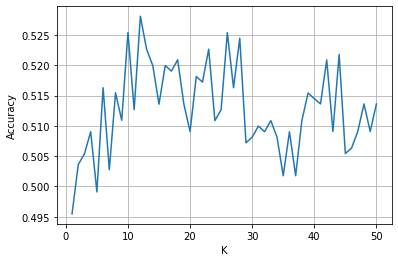

In [20]:
plt.plot([i for i in range(1,51)],acc)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [21]:
print("for k={} we are getting {} accuracy".format(acc.index(max(acc))+1,max(acc)*100))

for k=12 we are getting 52.81159077291229 accuracy


In [14]:
score=pd.DataFrame(scores)

In [22]:
score

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,0.506787,0.520362,0.542986,0.561086,0.497738,0.542986,0.493213,0.520362,0.520362,0.552036,...,0.538462,0.547511,0.542986,0.561086,0.538462,0.533937,0.542986,0.538462,0.547511,0.529412
1,0.468182,0.536364,0.522727,0.522727,0.495455,0.563636,0.495455,0.550000,0.504545,0.527273,...,0.518182,0.545455,0.509091,0.536364,0.486364,0.500000,0.486364,0.495455,0.500000,0.527273
2,0.522727,0.490909,0.513636,0.490909,0.477273,0.495455,0.527273,0.495455,0.509091,0.509091,...,0.472727,0.459091,0.454545,0.468182,0.481818,0.472727,0.504545,0.522727,0.500000,0.509091
3,0.468182,0.477273,0.472727,0.468182,0.522727,0.495455,0.481818,0.477273,0.481818,0.513636,...,0.504545,0.518182,0.509091,0.504545,0.509091,0.513636,0.486364,0.481818,0.472727,0.486364
4,0.511416,0.493151,0.474886,0.502283,0.502283,0.484018,0.515982,0.534247,0.538813,0.525114,...,0.534247,0.534247,0.529680,0.538813,0.511416,0.511416,0.525114,0.529680,0.525114,0.515982


In [ ]:
#utility code
l1=[]
l2=[]
for i in cc['pid']:
    for k,j in enumerate(pheno['SUB_ID']):
        if i==j:
            l1.append(pheno['SUB_ID'][k])
            if pheno['DX_GROUP'][k]==1:
                l2.append(1)
            else:
                l2.append(0)
len(l)
y=pd.DataFrame()
y['pid']=l1
y['label']=l2

In [2]:
temp1=pd.read_csv('ABIDE_CC/abide_cc_12_features_data/abide.cc.area.csv')
temp2=pd.read_csv('12_features_labels.csv')

In [8]:
#del temp1['Unnamed: 0'],temp1['Unnamed: 0.1'],temp1['Unnamed: 0.1.1']
temp1['y']=temp2['label']
temp1

,pid,ID,CC_area,CC_perimeter,CC_circularity,CC_length,W1,W2,W3,W4,W5,W6,W7,volume,y
0,50002,./Pitt/0050002/session_1/anat_1/abide_cc,674.75,216.77,0.180444,76.5,28.25,135.25,95.50,83.50,74.75,58.25,199.25,1654001.750,1
1,50003,./Pitt/0050003/session_1/anat_1/abide_cc,620.50,196.34,0.202275,73.0,11.50,124.75,112.50,85.25,60.75,51.75,174.00,1566818.750,1
2,50004,./Pitt/0050004/session_1/anat_1/abide_cc,617.00,203.15,0.187880,74.0,22.75,160.25,92.50,71.00,60.75,43.50,166.25,1603843.625,1
3,50005,./Pitt/0050005/session_1/anat_1/abide_cc,524.50,191.32,0.180072,67.5,18.25,79.25,95.25,65.00,53.75,52.00,161.00,1434097.750,1
4,50006,./Pitt/0050006/session_1/anat_1/abide_cc,655.25,206.12,0.193817,77.0,15.00,141.00,103.25,88.50,69.75,52.50,185.25,1520944.500,1
5,50007,./Pitt/0050007/session_1/anat_1/abide_cc,812.00,224.21,0.202984,78.0,28.00,186.25,109.00,96.25,79.00,87.75,225.75,1878676.500,1
6,50008,./Pitt/0050008/session_1/anat_1/abide_cc,600.00,202.51,0.183852,72.0,21.50,127.50,88.25,65.50,60.00,57.50,179.75,1552326.875,1
7,50009,./Pitt/0050009/session_1/anat_1/abide_cc,707.00,263.33,0.128124,87.0,21.50,110.00,124.50,85.25,66.25,52.00,247.50,1702404.625,1
8,50010,./Pitt/0050010/session_1/anat_1/abide_cc,408.50,159.76,0.201122,59.0,4.75,75.00,76.50,53.50,48.25,30.25,120.25,1117105.250,1
9,50011,./Pitt/0050011/session_1/anat_1/abide_cc,626.75,230.60,0.148108,76.0,39.50,107.50,125.00,63.00,62.75,55.00,174.00,1827121.375,1


In [11]:
l=[]
for i in temp1['ID']:
    l.append(i.split('/')[1])
temp1['site_id']=l

In [12]:
temp1.head()

,pid,ID,CC_area,CC_perimeter,CC_circularity,CC_length,W1,W2,W3,W4,W5,W6,W7,volume,y,site_id
0,50002,./Pitt/0050002/session_1/anat_1/abide_cc,674.75,216.77,0.180444,76.5,28.25,135.25,95.50,83.50,74.75,58.25,199.25,1654001.750,1,Pitt
1,50003,./Pitt/0050003/session_1/anat_1/abide_cc,620.50,196.34,0.202275,73.0,11.50,124.75,112.50,85.25,60.75,51.75,174.00,1566818.750,1,Pitt
2,50004,./Pitt/0050004/session_1/anat_1/abide_cc,617.00,203.15,0.187880,74.0,22.75,160.25,92.50,71.00,60.75,43.50,166.25,1603843.625,1,Pitt
3,50005,./Pitt/0050005/session_1/anat_1/abide_cc,524.50,191.32,0.180072,67.5,18.25,79.25,95.25,65.00,53.75,52.00,161.00,1434097.750,1,Pitt
4,50006,./Pitt/0050006/session_1/anat_1/abide_cc,655.25,206.12,0.193817,77.0,15.00,141.00,103.25,88.50,69.75,52.50,185.25,1520944.500,1,Pitt


In [13]:
temp1.to_csv('ABIDE_CC/abide_cc_12_features_data/abide.cc.area.csv')